In [2]:
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode

In [4]:
# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= None 


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'


In [5]:
def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [6]:
def search(api_key, term, location, categories, sort_by, price):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'categories': categories.replace(' ', '+'),
        'sort_by': sort_by.replace(' ', '+'),
        'price': price.replace(' ', '+'),
        
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

In [7]:
results = search('INSERT_API_KEY_HERE',
                'restaurant', 'Helsinki', '(breakfast_brunch, All)', 'review_count', '1,2' )

#print(results)

Querying https://api.yelp.com/v3/businesses/search ...


In [8]:
print(json.dumps(results, indent = 4))

{
    "businesses": [
        {
            "id": "--Y8vvqTZ0IK0GqNNgM8Kg",
            "alias": "karl-fazer-caf\u00e9-helsinki-2",
            "name": "Karl Fazer Caf\u00e9",
            "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/8EwBLDJdVdcDv6ixuyQ6fg/o.jpg",
            "is_closed": false,
            "url": "https://www.yelp.com/biz/karl-fazer-caf%C3%A9-helsinki-2?adjust_creative=vTHF9_fkcBqIOP72pOV9rA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=vTHF9_fkcBqIOP72pOV9rA",
            "review_count": 87,
            "categories": [
                {
                    "alias": "coffee",
                    "title": "Coffee & Tea"
                },
                {
                    "alias": "desserts",
                    "title": "Desserts"
                },
                {
                    "alias": "breakfast_brunch",
                    "title": "Breakfast & Brunch"
                }
            ],
            "rating": 4.0,
         

In [9]:
restaurant_name = []
item = results['businesses']
for value in item:
    val = value['name']
    restaurant_name.append(val)
print(restaurant_name)
#restaurant_name

['Karl Fazer Café', 'Cafe Bar 9', 'Vapiano', "Putte's Bar & Pizza", 'Salve', 'Hoku', 'Friends & Brgrs', 'New Bamboo Center', 'Brooklyn Cafe', 'The Cock', 'La Torrefazione', "Stone's", 'Bryggeri', 'Döner Harju', 'Fratello Torrefazione', 'Café Esplanad', 'Belge', 'Konstan Möljä', "MorriSon's", 'Café Engel']


In [10]:
reviews = []
item = results['businesses']
for value in item:
    val = value['review_count']
    reviews.append(val)
print(reviews)
#reviews

[87, 58, 53, 48, 47, 42, 41, 41, 40, 39, 38, 35, 35, 33, 32, 31, 31, 30, 29, 29]


In [11]:
ratings = []
item = results['businesses']
for value in item:
    val = value['rating']
    ratings.append(val)
print(ratings)
#ratings

[4.0, 4.0, 3.5, 3.5, 4.0, 4.5, 4.0, 4.0, 4.5, 3.5, 4.0, 3.5, 4.0, 4.5, 4.5, 4.0, 3.5, 4.0, 3.5, 4.0]


In [12]:
price = []
item = results['businesses']
for value in item:
    val = value['price']
    price.append(val)
print(price)
#price    

['€€', '€€', '€€', '€€', '€€', '€€', '€€', '€', '€', '€€', '€€', '€€', '€€', '€', '€€', '€€', '€€', '€€', '€€', '€€']


In [13]:
distance = []
item = results['businesses']
for value in item:
    val = value['distance']
    distance.append(val)
print(distance)
#latitude 

[2630.24288045404, 3059.8895559572816, 2391.2835404294187, 2807.627427842221, 3606.7963136407893, 2668.7470812834868, 2527.989908109588, 2797.3691488815602, 3465.2386881917687, 2991.824400455336, 2633.987113135857, 2601.7602319793436, 2712.720921360248, 508.37248847246036, 2510.299493211863, 2763.0907174151716, 2591.5889733275244, 3364.8422433358837, 2536.4563078822953, 2605.921009662311]


Combine all the needed attributes

In [23]:
data = pd.DataFrame({'reviews_count':reviews, 
                     'ratings':ratings, 'price':price, 'distance':distance}, index=restaurant_name )
data.head()

,reviews_count,ratings,price,distance
Karl Fazer Café,87,4.0,€€,2630.242880
Cafe Bar 9,58,4.0,€€,3059.889556
Vapiano,53,3.5,€€,2391.283540
Putte's Bar & Pizza,48,3.5,€€,2807.627428
Salve,47,4.0,€€,3606.796314


The distance is in meter, so we can convert it to km

In [24]:
data['distance'] = data['distance'] / 1000

data.head()

,reviews_count,ratings,price,distance
Karl Fazer Café,87,4.0,€€,2.630243
Cafe Bar 9,58,4.0,€€,3.059890
Vapiano,53,3.5,€€,2.391284
Putte's Bar & Pizza,48,3.5,€€,2.807627
Salve,47,4.0,€€,3.606796


Replace € with 9 and €€ with 19

In [25]:
data['price'] = data['price'].apply(lambda x: 9 if x == '€' else 19)
data.head()

,reviews_count,ratings,price,distance
Karl Fazer Café,87,4.0,19,2.630243
Cafe Bar 9,58,4.0,19,3.059890
Vapiano,53,3.5,19,2.391284
Putte's Bar & Pizza,48,3.5,19,2.807627
Salve,47,4.0,19,3.606796


Bar plot: All in one

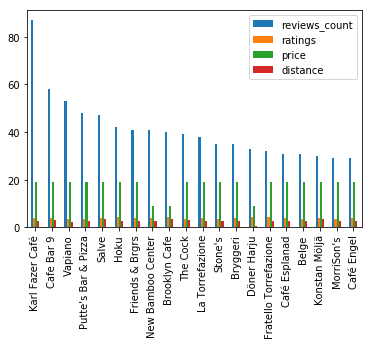

In [26]:
data.plot.bar()

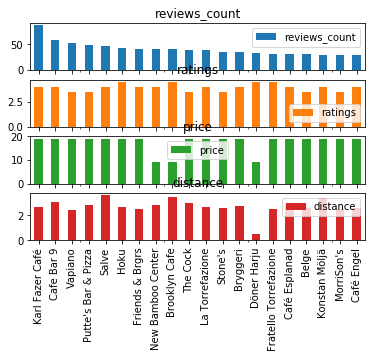

In [27]:
axes = data.plot.bar(subplots=True)
axes[1].legend(loc= 4) 